In [ ]:
#!pip install datarobot --upgrade

In [1]:
#Import Packages
import pandas as pd
#import pandas_profiling
import seaborn as sns
import datarobot as dr
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

ImportError: No module named 'seaborn'

In [3]:
dr.__version__

'2.14.1'

# Objectives
## Use the python API to start, control and analyze projects
## Get ideas going for extensions of the API into data-driven products / enhanced analytics
## Learn how to build a model factory
### Specifically, we'll touch on:
- Create a single project via the python API
- Manipulate feature lists
- Access DataRobot project objects to summarize results
- Find BluePrints and run individual models (extension - **bootstrap confidence intervals, prediction intervals, custom autopilot**) 
- Start and retrieve Feature Impact and Prediction Explanations - (extension- **, custom feature selection scripts, clustering prediction explanations**) 
- Access common plot graphics like the Lift Chart and ROC Curve (extension - **custom leaderboard by precision / recall**)
- Build a model factory for multiple targets (extension - **multiple datasets, multilabel topic modeling/text classification for NLP**)

# Accessing data: Predicting the quality of wine

In [4]:
#Download and Show Wine Table
wine = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv", delimiter=";")
wine[0:15]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.70,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.60,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.90,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.50,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.50,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,8.1,0.28,0.40,6.90,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
6,6.2,0.32,0.16,7.00,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6
7,7.0,0.27,0.36,20.70,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
8,6.3,0.30,0.34,1.60,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
9,8.1,0.22,0.43,1.50,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6


In [ ]:
#wine = pd.read_csv('C://yourdrive/wine_data.csv', encoding='latin-1', sep=';')

In [5]:
pandas_profiling.ProfileReport(wine)

NameError: name 'pandas_profiling' is not defined

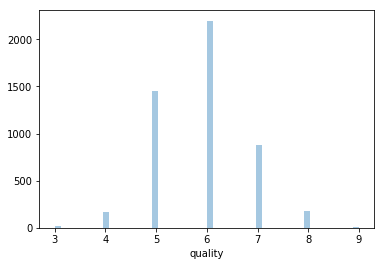

In [6]:
#Check wine quality distribution
sns.distplot(wine.quality, kde=False)

In [7]:
#Good Wine? Set wine of quality greater than 7 to True --> Create our target variable
wine["quality"] = wine["quality"] >= 7
wine[0:15]


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.70,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,False
1,6.3,0.30,0.34,1.60,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,False
2,8.1,0.28,0.40,6.90,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,False
3,7.2,0.23,0.32,8.50,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,False
4,7.2,0.23,0.32,8.50,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,False
5,8.1,0.28,0.40,6.90,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,False
6,6.2,0.32,0.16,7.00,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,False
7,7.0,0.27,0.36,20.70,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,False
8,6.3,0.30,0.34,1.60,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,False
9,8.1,0.22,0.43,1.50,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,False


# Connecting to DataRobot and controlling basic project settings

In [2]:
#Connect to DataRobot and Import credentials - Never share your api token with anyone else
# your endpoint if on prem will need to be the url you use to connect to datarabot followed by /api/v2
dr.Client(token="YOUR TOKEN HERE", endpoint="https://app.datarobot.com/api/v2")


NameError: name 'dr' is not defined

In [ ]:
# #example of connecting to an existing project for illustration
# p1= dr.Project.get(project_id='5be44af74601f03e0e7a699b')
# p1.project_name

In [9]:
#Create the project in the DataRobot Cloud
# Note we are only uploading data at this point
project = dr.Project.create(sourcedata=wine,
                           project_name='Wine Quality 5')

In [15]:
project.open_leaderboard_browser()

True

In [12]:
?dr.Project.set_target

In [13]:
#Sets target and kicks off modeling
project.set_target(target='quality', mode='manual')

Project(Wine Quality 5)

In [ ]:
### if we didn't callout manual mode above, we could use this call to poll the time to finish full autopilot
#Creates verbose indicating how many are in progress, in queue with wait times

#project.wait_for_autopilot()

In [16]:
#Add more workers
project.set_worker_count(20)

Project(Wine Quality 5)

In [17]:
project.get_features()

[Feature(residual sugar),
 Feature(alcohol),
 Feature(chlorides),
 Feature(density),
 Feature(sulphates),
 Feature(total sulfur dioxide),
 Feature(fixed acidity),
 Feature(citric acid),
 Feature(pH),
 Feature(quality),
 Feature(volatile acidity),
 Feature(free sulfur dioxide)]

In [18]:
features = project.get_features()
data_tab =pd.DataFrame([f.__dict__ for f in features])
data_tab
#note the numeric value of the ACE score and other datatab features

,date_format,feature_type,id,importance,low_information,max,mean,median,min,na_count,name,project_id,std_dev,target_leakage,time_series_eligibility_reason,time_series_eligible,time_step,time_unit,unique_count
0,None,Numeric,3,0.024303,False,65.800,6.4004,5.200,0.600,0,residual sugar,5c842673f30bc31a0ecd0367,5.11000,FALSE,notADate,False,None,None,301
1,None,Numeric,10,0.149880,False,14.200,10.5200,10.400,8.000,0,alcohol,5c842673f30bc31a0ecd0367,1.24000,FALSE,notADate,False,None,None,96
2,None,Numeric,4,0.074281,False,0.350,0.0460,0.043,0.009,0,chlorides,5c842673f30bc31a0ecd0367,0.02200,FALSE,notADate,False,None,None,145
3,None,Numeric,7,0.097819,False,1.039,0.9900,0.990,0.990,0,density,5c842673f30bc31a0ecd0367,0.00302,FALSE,notADate,False,None,None,828
4,None,Numeric,9,0.013404,False,1.080,0.4900,0.470,0.220,0,sulphates,5c842673f30bc31a0ecd0367,0.11000,FALSE,notADate,False,None,None,78
5,None,Numeric,6,0.042322,False,440.000,137.8800,134.000,9.000,0,total sulfur dioxide,5c842673f30bc31a0ecd0367,42.48000,FALSE,notADate,False,None,None,246
6,None,Numeric,0,0.005767,False,14.200,6.8600,6.800,3.800,0,fixed acidity,5c842673f30bc31a0ecd0367,0.85000,FALSE,notADate,False,None,None,68
7,None,Numeric,2,0.006652,False,1.660,0.3300,0.320,0.000,0,citric acid,5c842673f30bc31a0ecd0367,0.12000,FALSE,notADate,False,None,None,85
8,None,Numeric,8,0.009570,False,3.820,3.1900,3.180,2.720,0,pH,5c842673f30bc31a0ecd0367,0.15000,FALSE,notADate,False,None,None,102
9,None,Boolean,11,1.000000,False,1.000,0.2200,0.000,0.000,0,quality,5c842673f30bc31a0ecd0367,0.41000,SKIPPED_DETECTION,notADate,False,None,None,2


# Examine individual models and select certain ones 

In [19]:
menu = project.get_blueprints()
menu[0:20]

[Blueprint(Mahalanobis Distance Ranked Anomaly Detection with PCA),
 Blueprint(Elastic-Net Classifier (L2 / Binomial Deviance) with Binned numeric features),
 Blueprint(eXtreme Gradient Boosted Trees Classifier with Unsupervised Learning Features),
 Blueprint(Nystroem Kernel SVM Classifier),
 Blueprint(Dropout Additive Regression Trees Classifier  (15 leaves)),
 Blueprint(RandomForest Classifier (Gini)),
 Blueprint(eXtreme Gradient Boosted Trees Classifier with Early Stopping),
 Blueprint(Isolation Forest Anomaly Detection),
 Blueprint(Eureqa Classifier (Long-Running Search: 10000 Generations)),
 Blueprint(Gradient Boosted Greedy Trees Classifier),
 Blueprint(Eureqa Generalized Additive Model Classifier (10000 Generations)),
 Blueprint(Support Vector Classifier (Linear Kernel)),
 Blueprint(Local Outlier Factor Anomaly Detection),
 Blueprint(Vowpal Wabbit Classifier),
 Blueprint(Elastic-Net Classifier (L2 / Binomial Deviance)),
 Blueprint(eXtreme Gradient Boosted Trees Classifier (learn

In [20]:
bps_to_run = [bp for bp in menu if 'Boosted' in str(bp)]
bps_to_run

[Blueprint(eXtreme Gradient Boosted Trees Classifier with Unsupervised Learning Features),
 Blueprint(eXtreme Gradient Boosted Trees Classifier with Early Stopping),
 Blueprint(Gradient Boosted Greedy Trees Classifier),
 Blueprint(eXtreme Gradient Boosted Trees Classifier (learning rate =0.01)),
 Blueprint(eXtreme Gradient Boosted Trees Classifier (learning rate =0.01)),
 Blueprint(eXtreme Gradient Boosted Trees Classifier with Early Stopping),
 Blueprint(eXtreme Gradient Boosted Trees Classifier (learning rate =0.01)),
 Blueprint(Gradient Boosted Trees Classifier),
 Blueprint(eXtreme Gradient Boosted Trees Classifier with Early Stopping - Forest (10x)),
 Blueprint(eXtreme Gradient Boosted Trees Classifier),
 Blueprint(Light Gradient Boosted Trees Classifier with Early Stopping),
 Blueprint(eXtreme Gradient Boosted Trees Classifier),
 Blueprint(Gradient Boosted Trees Classifier),
 Blueprint(eXtreme Gradient Boosted Trees Classifier)]

In [28]:
?dr.Project.train

## Run models manually and on different feature lists
### we could also imagine bootstrapping linear models here to get the mean and std of their coefficients

In [21]:
model_job_id = project.train(bps_to_run[0], scoring_type=dr.SCORING_TYPE.validation, sample_pct=16)

In [22]:
#get the featurelists in the project
project.get_featurelists()
#new_list=project.create_featurelist('example_new_feat_list', ['alcohol','sulphates'])

[Featurelist(Raw Features),
 Featurelist(Informative Features),
 Featurelist(Univariate Selections)]

In [23]:
#making new feature lists can be done with simple list comprehension as well, or filtering by data type, for example
new_list=project.create_featurelist('example_new_feat_list', ['alcohol','sulphates'])

In [24]:
new_list.id

'5c84295ff30bc31a35cd0442'

In [25]:
model_job_id2 = project.train(bps_to_run[5], featurelist_id=new_list.id, scoring_type=dr.SCORING_TYPE.validation, sample_pct=16)

In [26]:
model_job_id3 = project.train(bps_to_run[8], scoring_type=dr.SCORING_TYPE.validation, sample_pct=32)
model_job_id4 = project.train(bps_to_run[9], scoring_type=dr.SCORING_TYPE.cross_validation, sample_pct=64)

In [29]:
#Collects all the models from project as a sorted list object
models = project.get_models()
print('Model Names')
models[0:4]

Model Names


[Model('eXtreme Gradient Boosted Trees Classifier'),
 Model('eXtreme Gradient Boosted Trees Classifier with Early Stopping - Forest (10x)'),
 Model('eXtreme Gradient Boosted Trees Classifier with Unsupervised Learning Features'),
 Model('eXtreme Gradient Boosted Trees Classifier with Early Stopping')]

In [30]:
#Generates a summary of all model performances and put it into a DataFrame

# We could also get the results from many projects and look at them in one DataFrame
def  get_results (proj):
    """Args: A DataRobot project object
    
       returns: A dataframe sorted by log loss for validation"""
    project= dr.Project.get(project_id=proj)
    #extract featurelist
    feature_lists = project.get_featurelists()
    
    #get informative features, the default for autopilot
    #you could update this to your feature list
    f_list = [lst for lst in feature_lists if
                     lst.name == 'Informative Features'][0]
    
    #get models
    models = project.get_models()
    flist_models = [model for model in models if model.featurelist_id == f_list.id]
    
    #print results
    val_scores = pd.DataFrame([{'model_type': model.model_type,
                           'blueprint info': model.blueprint,
                           'model_id': model.id,
                           'sample_pct': model.sample_pct,
                           'featurelist': model.featurelist_name,
                           'val_logloss': model.metrics['LogLoss']['validation'],
                           'cross_val_logloss': model.metrics['LogLoss']['crossValidation'],
                           'f1_threshold':model.get_roc_curve(source='validation').get_best_f1_threshold()}
                           for model in flist_models if model.metrics['LogLoss'] is not None])
    
    return val_scores.sort_values(by='val_logloss')
modelframe = get_results(project.id)
modelframe

,blueprint info,cross_val_logloss,f1_threshold,featurelist,model_id,model_type,sample_pct,val_logloss
0,Blueprint(eXtreme Gradient Boosted Trees Class...,0.333606,0.260121,Informative Features,5c84296ef30bc31a4fcd03ab,eXtreme Gradient Boosted Trees Classifier,63.9854,0.33841
1,Blueprint(eXtreme Gradient Boosted Trees Class...,NaN,0.235111,Informative Features,5c84296ef30bc31a4fcd03a2,eXtreme Gradient Boosted Trees Classifier with...,31.9927,0.36154
2,Blueprint(eXtreme Gradient Boosted Trees Class...,NaN,0.189480,Informative Features,5c8428d2f30bc31a5ecd033c,eXtreme Gradient Boosted Trees Classifier with...,15.9862,0.41325


In [31]:
#Pulls the top model
#common tactic for grabbing the most accurate model on the leaderboard across multiple projects
topmodel = models[0]
topmodel

Model('eXtreme Gradient Boosted Trees Classifier')

In [32]:
topmodel.metrics['LogLoss']

{'backtesting': None,
 'holdout': None,
 'backtestingScores': None,
 'crossValidation': 0.333606,
 'validation': 0.33841}

In [33]:
#Get top model blueprint info
bp = dr.Blueprint.get(project.id, topmodel.blueprint_id)
processes = bp.processes
docs = bp.get_documents()
print(processes)

['Missing Values Imputed', 'Search for differences', 'Ordinal encoding of categorical variables', 'Matrix of word-grams occurrences', 'Elastic-Net Classifier (L2 / Binomial Deviance)', 'eXtreme Gradient Boosted Trees Classifier']


In [34]:
docs

[BlueprintTaskDocument(Missing Values Imputed Documentation — DataRobot Model Documentation),
 BlueprintTaskDocument(Bind branches Documentation — DataRobot Model Documentation),
 BlueprintTaskDocument(Matrix of word-grams occurrences Documentation — DataRobot Model Documentation),
 BlueprintTaskDocument(Ordinal encoding of categorical variables Documentation — DataRobot Model Documentation),
 BlueprintTaskDocument(eXtreme Gradient Boosted Trees Classifier Documentation — DataRobot Model Documentation),
 BlueprintTaskDocument(Elastic-Net Classifier (mixing alpha=auto / Binomial Deviance) Documentation — DataRobot Model Documentation),
 BlueprintTaskDocument(Search for differences Documentation — DataRobot Model Documentation)]

In [35]:
# Getting Predictions -----------------------------------------------------

#Simply using training for illustration
dataset_from_file = project.upload_dataset(wine)

predict_job_1 = topmodel.request_predictions(dataset_from_file.id)

predictions = predict_job_1.get_result_when_complete(max_wait=300)
predictions = predict_job_1.get_result()
predictions[0:15]

,positive_probability,prediction,prediction_threshold,row_id,class_0.0,class_1.0
0,0.041193,0.0,0.5,0,0.958807,0.041193
1,0.014325,0.0,0.5,1,0.985675,0.014325
2,0.033094,0.0,0.5,2,0.966906,0.033094
3,0.061648,0.0,0.5,3,0.938352,0.061648
4,0.061648,0.0,0.5,4,0.938352,0.061648
5,0.033094,0.0,0.5,5,0.966906,0.033094
6,0.006761,0.0,0.5,6,0.993239,0.006761
7,0.041193,0.0,0.5,7,0.958807,0.041193
8,0.014325,0.0,0.5,8,0.985675,0.014325
9,0.145350,0.0,0.5,9,0.854650,0.145350


In [36]:
predict_job_1.id

15

,accuracy,f1_score,false_negative_score,false_positive_rate,false_positive_score,matthews_correlation_coefficient,negative_predictive_value,positive_predictive_value,threshold,true_negative_rate,true_negative_score,true_positive_rate,true_positive_score
0,0.783618,0.000000,848,0.000000,0,0.000000,0.783618,0.000000,1.000000,1.000000,3071,0.000000,0
1,0.783363,0.000000,848,0.000326,1,-0.008395,0.783563,0.000000,0.964634,0.999674,3070,0.000000,0
2,0.789487,0.063564,820,0.001628,5,0.141459,0.788986,0.848485,0.913557,0.998372,3066,0.033019,28
3,0.792039,0.087346,809,0.001954,6,0.170203,0.791172,0.866667,0.900098,0.998046,3065,0.045991,39
4,0.801225,0.168623,769,0.003256,10,0.248498,0.799217,0.887640,0.875908,0.996744,3061,0.093160,79
5,0.804287,0.191781,757,0.003256,10,0.270410,0.801729,0.900990,0.864217,0.996744,3061,0.107311,91
6,0.810666,0.244399,728,0.004559,14,0.310325,0.807662,0.895522,0.836187,0.995441,3057,0.141509,120
7,0.817555,0.291378,701,0.004559,14,0.350182,0.813465,0.913043,0.811414,0.995441,3057,0.173349,147
8,0.818576,0.304985,692,0.006187,19,0.354423,0.815171,0.891429,0.800103,0.993813,3052,0.183962,156
9,0.825976,0.357815,658,0.007815,24,0.391901,0.822402,0.887850,0.770862,0.992185,3047,0.224057,190


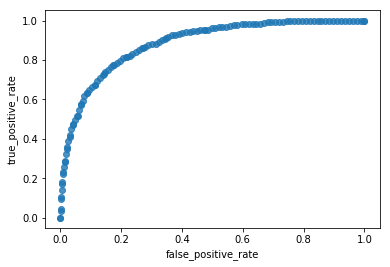

In [37]:
#Get the ROC curve information and visualize
roc = topmodel.get_roc_curve('crossValidation')
rocframe = pd.DataFrame(roc.roc_points)
rocframe[0:15]
sns.regplot(x=rocframe.false_positive_rate, y=rocframe.true_positive_rate, fit_reg=False)
rocframe[0:15]

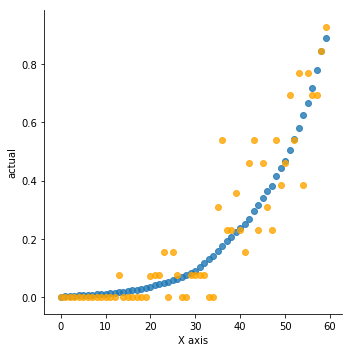

In [38]:
#Get lift chart data and visualize
lc = topmodel.get_lift_chart('validation')
bins_df = pd.DataFrame(lc.bins)
bins_df.head()
bins_df["X axis"] = bins_df.index
g = sns.lmplot(x="X axis", y="predicted", data=bins_df, fit_reg=False)
sns.regplot(y='actual', data=bins_df, x="X axis", fit_reg=False, color="orange", label="actual")

## Run Feature Impact and Prediction Explanations
### we could also imagine evaluating feature impact across all model families, or clustering prediction explanations to see patterns in prediction behavior for customers

In [39]:
#Get Feature Impact information for the top model
max_num_features = 15
time_to_wait_for_impact = 4 * 60  # seconds

try:
    feature_impacts = topmodel.get_feature_impact()  # if they've already been computed
except dr.errors.ClientError as e:
    assert e.status_code == 404  # the feature impact score haven't been computed yet
    impact_job = topmodel.request_feature_impact()
    feature_impacts = impact_job.get_result_when_complete(time_to_wait_for_impact)

feature_impacts.sort(key=lambda x: x['impactNormalized'], reverse=True)
FeatureImpactDF = pd.DataFrame([{'Impact Normalized': f["impactNormalized"],
                            'Feature Name': f["featureName"]}
                            for f in feature_impacts[:max_num_features]])

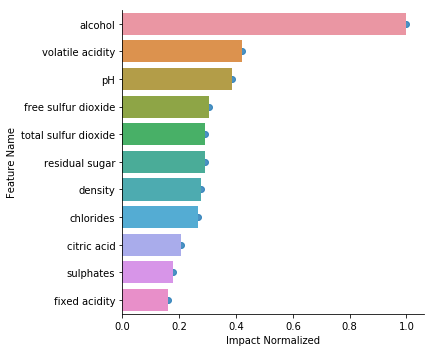

In [40]:
#Graph Feature Impact based on the normalized impact
FeatureImpactDF["X axis"] = FeatureImpactDF.index
g = sns.lmplot(x="Impact Normalized", y="X axis", data=FeatureImpactDF, fit_reg=False)
sns.barplot(y=FeatureImpactDF["Feature Name"], x=FeatureImpactDF["Impact Normalized"])

In [ ]:
# # Generate reason codes
# rci_job = dr.ReasonCodesInitialization.create(project.id, topmodel.id)
# rci_job.wait_for_completion()
# rc = rci_job.get_result_when_complete()

In [41]:
#initialize prediction explanations
pe_job = dr.PredictionExplanationsInitialization.create(project.id, topmodel.id)
pe_job.wait_for_completion()

In [42]:
# Compute prediction explanations with default parameters
pe_job2 = dr.PredictionExplanations.create(project.id, topmodel.id, dataset_from_file.id)
pe = pe_job2.get_result_when_complete()

In [43]:
#retreive the results as a data frame
pe.get_all_as_dataframe()[0:25]

,row_id,prediction,class_0_label,class_0_probability,class_1_label,class_1_probability,explanation_0_feature,explanation_0_feature_value,explanation_0_label,explanation_0_qualitative_strength,...,explanation_1_feature,explanation_1_feature_value,explanation_1_label,explanation_1_qualitative_strength,explanation_1_strength,explanation_2_feature,explanation_2_feature_value,explanation_2_label,explanation_2_qualitative_strength,explanation_2_strength
0,0,0.0,1.0,0.041193,0.0,0.958807,residual sugar,20.700,1.0,---,...,density,1.0010,1.0,+++,0.892298,volatile acidity,0.2700,1.0,--,-0.574094
1,1,0.0,1.0,0.014325,0.0,0.985675,alcohol,9.500,1.0,---,...,volatile acidity,0.3000,1.0,--,-0.282650,residual sugar,1.6000,1.0,--,-0.235965
2,2,0.0,1.0,0.033094,0.0,0.966906,alcohol,10.100,1.0,---,...,volatile acidity,0.2800,1.0,---,-0.780423,free sulfur dioxide,30.0000,1.0,++,0.253702
3,3,0.0,1.0,0.061648,0.0,0.938352,volatile acidity,0.230,1.0,+++,...,density,0.9956,1.0,--,-0.558193,fixed acidity,7.2000,1.0,++,0.463924
4,4,0.0,1.0,0.061648,0.0,0.938352,volatile acidity,0.230,1.0,+++,...,density,0.9956,1.0,--,-0.558193,fixed acidity,7.2000,1.0,++,0.463924
5,5,0.0,1.0,0.033094,0.0,0.966906,alcohol,10.100,1.0,---,...,volatile acidity,0.2800,1.0,---,-0.780423,free sulfur dioxide,30.0000,1.0,++,0.253702
6,6,0.0,1.0,0.006761,0.0,0.993239,alcohol,9.600,1.0,---,...,citric acid,0.1600,1.0,---,-1.010358,pH,3.1800,1.0,--,-0.365873
7,7,0.0,1.0,0.041193,0.0,0.958807,residual sugar,20.700,1.0,---,...,density,1.0010,1.0,+++,0.892298,volatile acidity,0.2700,1.0,--,-0.574094
8,8,0.0,1.0,0.014325,0.0,0.985675,alcohol,9.500,1.0,---,...,volatile acidity,0.3000,1.0,--,-0.282650,residual sugar,1.6000,1.0,--,-0.235965
9,9,0.0,1.0,0.145350,0.0,0.854650,fixed acidity,8.100,1.0,--,...,sulphates,0.4500,1.0,--,-0.256543,residual sugar,1.5000,1.0,--,-0.229939


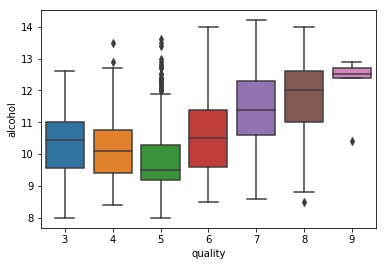

In [44]:
#Good wines have higher alcohol content 
wine = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv", delimiter=";")
bp = sns.boxplot(y="alcohol", x="quality", data=wine)

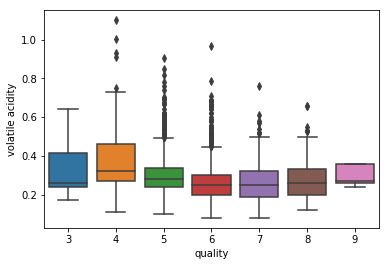

In [45]:
# and less volatile acidity
bp2 = sns.boxplot(y="volatile acidity", x="quality", data=wine)

# Model Factory- creating LOTS of projects with little effort across a range of subsets of data

### we can imagine building lots of 1 vs all classification projects, multilabel models for recommendations in marketing, segmenting models by levels in a column.... this really utilizes the power of DataRobot in an awesome way for data scientists


In [57]:
from IPython.core.display import display, HTML
def create_project( dataframe, target_name ):
    """ARGS: Pandas data frame, and (Str) target name
    
       RETURNS: DataRobot project object
    """
    
    from datarobot import FeatureSettings
    
    # create new project
    project_name = '_{v} - {t}'.format( v=target_name, t=pd.datetime.now().strftime( '%Y%m%d%H%M') )
    project = dr.Project.create(
        project_name=project_name,
        sourcedata=dataframe,
    )
    link = project.get_leaderboard_ui_permalink()
    display(HTML("""<a href="{link}">{link}</a>""".format( link=link )))

 
    # start autopilot
    project.set_target(target=target_name,
                    worker_count=4, #I set this to 4 but it is up to how many resources you have
                    #partitioning_method=could_be_some_custom_setting_of_yours,
                    max_wait=1800)
    
    return project

## Define targets to predict - hear we'll just use a few columns and pretend we want to make each it's own target in a project with no other targets present

In [58]:
target_list=[col for col in wine.columns if 'acid' in col]
target_list

['fixed acidity', 'volatile acidity', 'citric acid']

In [59]:
#create a dataframe of just targets
targets = wine[target_list]
targets.head(5)

,fixed acidity,volatile acidity,citric acid
0,7.0,0.27,0.36
1,6.3,0.30,0.34
2,8.1,0.28,0.40
3,7.2,0.23,0.32
4,7.2,0.23,0.32


In [60]:
#create a dataframe of just FEATURES 
features = wine.drop(targets, axis=1)
#features = features.drop('Unnamed: 0', axis=1)
features.head(5)

,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [61]:
%%time

# kick off the projects
projects = {}

for i, target_name in enumerate(targets.columns):
    #append that unique target to the input features
    frame = pd.concat([features, targets.loc[:, [target_name]]], axis=1)
    #run the project
    proj = create_project( frame, target_name)
    #store it
    projects[ target_name] = proj

CPU times: user 520 ms, sys: 45 ms, total: 565 ms
Wall time: 2min 55s
